# 网络中的网络（NiN）

NiN块

In [1]:
import sys
sys.path.append('..')

In [2]:
from d2l import mindspore as d2l
from mindspore import nn, ops

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.SequentialCell([
        nn.Conv2d(in_channels, out_channels, kernel_size, strides, 'pad', padding),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1),
        nn.ReLU(),
        nn.Conv2d(out_channels, out_channels, kernel_size=1), 
        nn.ReLU()])

NiN模型

In [5]:
net = nn.SequentialCell([
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(keep_prob=1-0.5),
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten()])

查看每个块的输出形状

In [6]:
X = ops.randn(1, 1, 224, 224)
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

SequentialCell output shape:	 (1, 96, 54, 54)
MaxPool2d output shape:	 (1, 96, 26, 26)
SequentialCell output shape:	 (1, 256, 26, 26)
MaxPool2d output shape:	 (1, 256, 12, 12)
SequentialCell output shape:	 (1, 384, 12, 12)
MaxPool2d output shape:	 (1, 384, 5, 5)
Dropout output shape:	 (1, 384, 5, 5)
SequentialCell output shape:	 (1, 10, 5, 5)
AdaptiveAvgPool2d output shape:	 (1, 10, 1, 1)
Flatten output shape:	 (1, 10)


训练模型

loss 0.337, train acc 0.906, test acc 0.879
2668.0 examples/sec


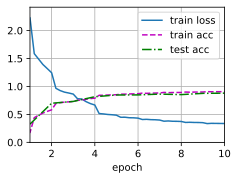

In [7]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)